In [1]:
import pandas as pd    

In [2]:
df = pd.read_csv('data/Value_of_Energy_Cost_Savings_Program_Savings_for_Businesses_-_FY2020.csv', sep= ',', header = 0)

In [3]:
print(df.head())

                               Company Name    company contact  \
0                            1 State Street      David Neiburg   
1                            100 Church LLC  Edward A. Carroll   
2                      100 Wall Investments       Jerry Branam   
3               1-10 Bush Terminal Owner LP     Andrew Kimball   
4  120 Broadway Acquisitions JV, LLC (Ldmk)        Carl Letich   

               company email company phone                Address      City  \
0     eskoblo@energyspec.com    7186779077          1114 Avenue J  Brooklyn   
1                        NaN    2125663000      100 Church Street        NY   
2                        NaN    2122487160         96 Wall Street  New York   
3  akimball@industrycity.com    3474178429  220 36th St, Suite 2A  Brooklyn   
4      clettich@silvprop.com    2124064020           120 Broadway  New York   

  State  Postcode    Industry  \
0    NY     11230  Commercial   
1    NY     10007  Commercial   
2    NY     10005    Landlord

In [4]:
print(df.columns)

Index(['Company Name', 'company contact', 'company email', 'company phone',
       'Address', 'City', 'State', 'Postcode', 'Industry', 'Industry descr',
       'Company Type', 'Current fulltime', 'Job created', 'Job retain',
       'Effective Date', 'Total Savings',
       'Savings from beginning receiving benefits', 'Borough', 'Latitude',
       'Longitude', 'Community Board', 'Council District', 'Census Tract',
       'BIN', 'BBL', 'NTA'],
      dtype='object')


## Day 4

### Q1. How many different companies are represented in the data set?

In [5]:
num_companies = df['Company Name'].nunique()
print("Number of different companies in the dataset:", num_companies)

Number of different companies in the dataset: 439


### Q2. What is the total number of jobs created for businesses in Queens?

In [6]:
total_jobs_queens = df.loc[df['City'] == 'Queens', 'Job created'].sum()
print("Total number of jobs created for businesses in Queens: ", total_jobs_queens)

Total number of jobs created for businesses in Queens:  90.0


### Q3. How many different unique email domains names are there in the data set?

In [7]:
df['domain'] = df['company email'].str.split('@').str[-1]
num_domains = df['domain'].nunique()
print("Number of unique email domains:", num_domains)

Number of unique email domains: 361


### Q4. Considering only NTAs with at least 5 listed businesses, what is the average total savings and the total jobs created for each NTA?

In [8]:
nta_filtered = df.groupby('NTA').filter(lambda x: len(x) >= 5)
nta_stats = nta_filtered.groupby('NTA').agg({'Total Savings': 'mean', 'Job created': 'sum'}).reset_index()


In [9]:
nta_stats.to_csv('Savings_Jobs_NTA5.csv', index=False)

# Day 5

In [10]:
import matplotlib.pyplot as plt

### scatter plot of jobs created versus average saving (standard scale) (nta_stats)

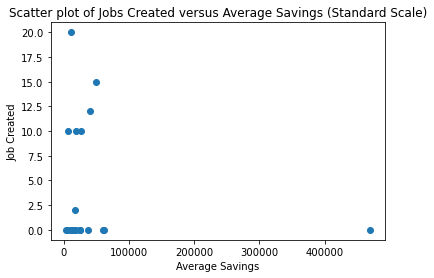

In [11]:
plt.scatter(nta_stats['Total Savings'], nta_stats['Job created'])
plt.xlabel('Average Savings')
plt.ylabel('Job Created')
plt.title('Scatter plot of Jobs Created versus Average Savings (Standard Scale)')
plt.show()

### scatter plot of jobs created versus average saving (standard scale) (nta_stats)

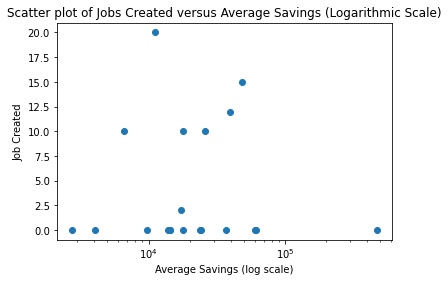

In [12]:
plt.scatter(nta_stats['Total Savings'], nta_stats['Job created'])
plt.xscale('log')
plt.xlabel('Average Savings (log scale)')
plt.ylabel('Job Created')
plt.title('Scatter plot of Jobs Created versus Average Savings (Logarithmic Scale)')
plt.show()

### histogram of the log of the average total savings (nta_filtered)

In [13]:
import numpy as np

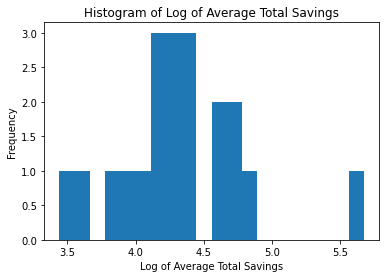

In [14]:
log_avg_savings = nta_filtered.groupby('NTA')['Total Savings'].mean().apply(lambda x: np.log10(x))

plt.hist(log_avg_savings, bins=20)
plt.xlabel('Log of Average Total Savings')
plt.ylabel('Frequency')
plt.title('Histogram of Log of Average Total Savings')
plt.show()

### line plot of the total jobs created for each month (full_data)

In [15]:
import matplotlib.dates as mdates

In [16]:
df['Date'] = pd.to_datetime(df['Effective Date'])  # Convert the 'Date' column to datetime
df.set_index('Date', inplace=True)  # Set the 'Date' column as the DataFrame's index
 # Aggregate jobs created by month
df.dropna(subset=['Job created'], inplace=True)

In [17]:
print(df['Job created']) #there are only limited datapoints for monthly job created.

Date
2004-03-05    10.0
2007-06-28    60.0
2007-11-06     5.0
2005-02-03    12.0
2006-03-01    10.0
2007-05-02     2.0
2007-04-10     2.0
1993-02-05    15.0
2007-06-08     3.0
2007-07-02    20.0
2008-12-09    10.0
Name: Job created, dtype: float64


In [18]:
jobs_by_month = df.resample('M').sum() 

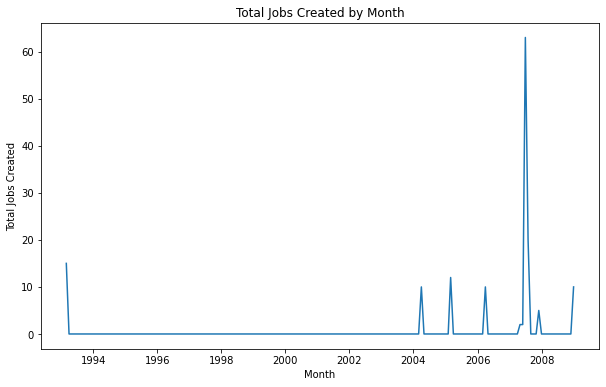

In [19]:
# Create a line plot of jobs created by month
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(jobs_by_month.index, jobs_by_month['Job created'])
ax.set_xlabel('Month')
ax.set_ylabel('Total Jobs Created')
ax.set_title('Total Jobs Created by Month')

plt.show()